In [1]:
import os
import json
import warnings

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from synthesized.testing.evaluation import Evaluation
from synthesized.testing import synthetic_distributions as syn_dist
from synthesized.testing import metrics as eval_metrics
from synthesized.testing import plotting as syn_plot
branch = os.environ.get('EVALUATION_BRANCH', 'n/a')
revision = os.environ.get('EVALUATION_REVISION', 'n/a')
group = "synthetic"
config_path = os.environ.get('EVALUATION_CONFIG_PATH', "configs/evaluation/synthetic_distributions.json")
with open(config_path, 'r') as f:
    configs = json.load(f)
    config = configs["instances"]["synthetic"]
evaluation = Evaluation(branch=branch, revision=revision, group=group)

W1210 14:50:07.288942 4486047168 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-3139-2D31-322D-B531
Expires at: 2019-12-31 00:00:00


### Time-series
#### Continuous

In [40]:
data = syn_dist.create_time_series_data(func=syn_dist.additive_sine(a=10, p=1000, sd=2), length=10000)

took 20.720242977142334 s
Metrics:
avg_distance: 0.1974
max_acf_distance: 0.937106132941002
max_pacf_distance: 0.9108314440779134
mean_squared_error: 6.661324318075896


## Plot time-series data

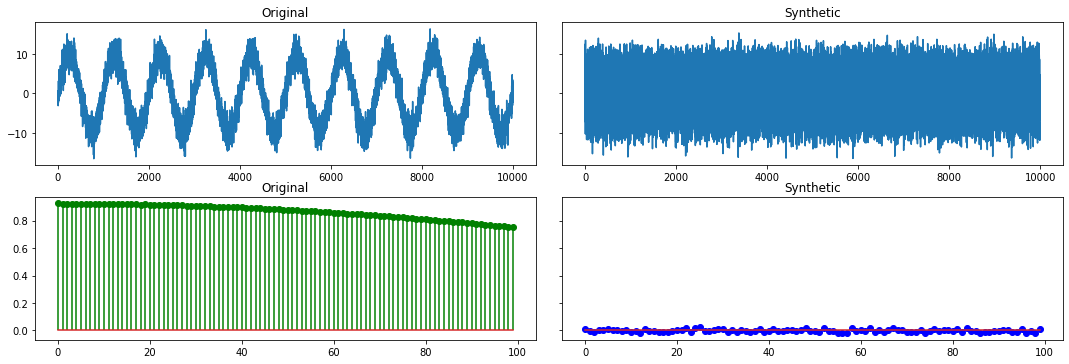

In [41]:
metrics = dict(eval_metrics.default_metrics)
metrics["max_acf_distance"] = eval_metrics.max_autocorrelation_distance
metrics["max_pacf_distance"] = eval_metrics.max_partial_autocorrelation_distance
metrics["mean_squared_error"] = eval_metrics.mean_squared_error_closure(col="x", baseline=2**4)
_ = syn_plot.synthesize_and_plot(data, "sine_additive_noise", evaluation=evaluation,
                                 metrics=metrics, config=config, time_series=True,
                                 max_lag=100)

#### Categorical

In [5]:
data = syn_dist.create_time_series_data(func=syn_dist.categorical_auto_regressive(n_classes=10, sd=2), length=10000)

took 17.916428089141846 s
Metrics:
avg_distance: 0.1837
max_auto_association_distance: 0.9999950318443828


## Plot time-series data

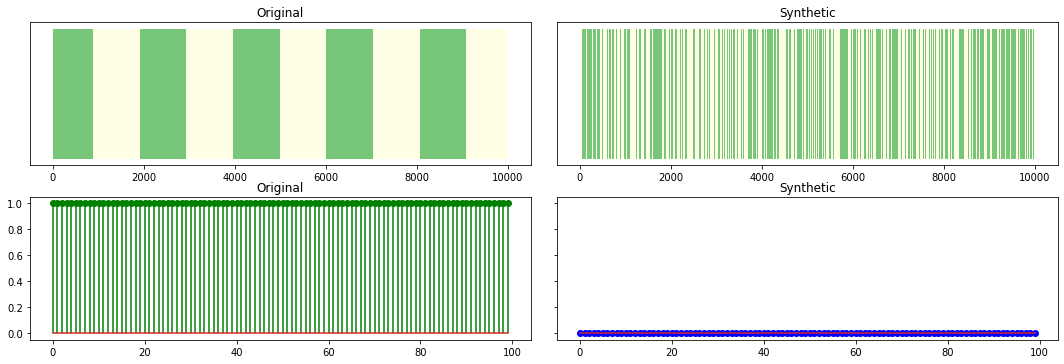

In [6]:
metrics = dict(eval_metrics.default_metrics)
metrics["max_auto_association_distance"] = eval_metrics.max_categorical_auto_association_distance
_ = syn_plot.synthesize_and_plot(data, "first_order_markov", evaluation=evaluation,
                                 metrics=metrics, config=config, time_series=True,
                                 max_lag=100)

In [ ]:
evaluation.write_metrics()